## 0. Install and Import Dependencies

In [ ]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

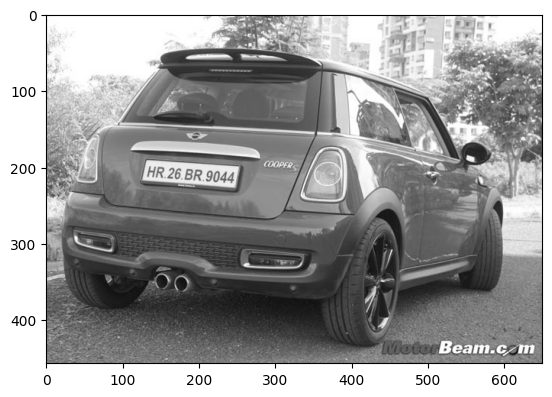

In [ ]:
img = cv2.imread('/content/image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

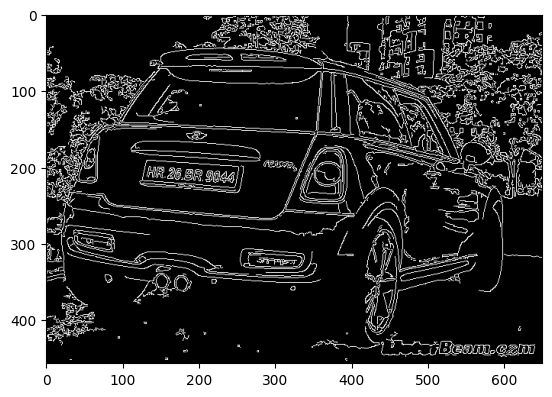

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

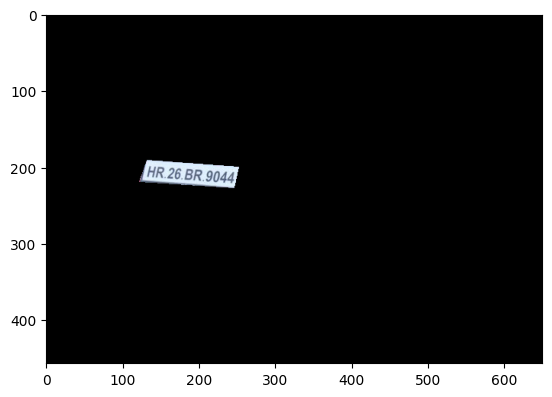

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

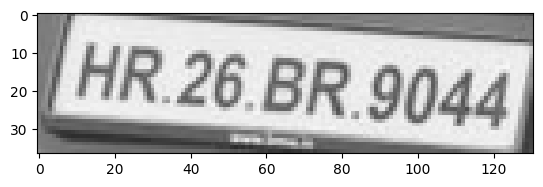

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[np.int32(6), np.int32(4)],
   [np.int32(128), np.int32(4)],
   [np.int32(128), np.int32(34)],
   [np.int32(6), np.int32(34)]],
  'HR.26 BR.9044',
  np.float64(0.572802443929149))]

## 5. Render Result

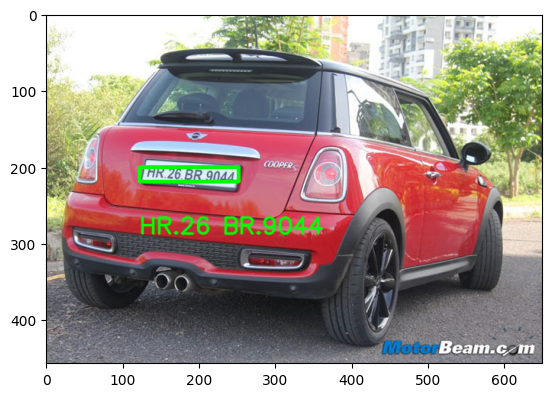

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

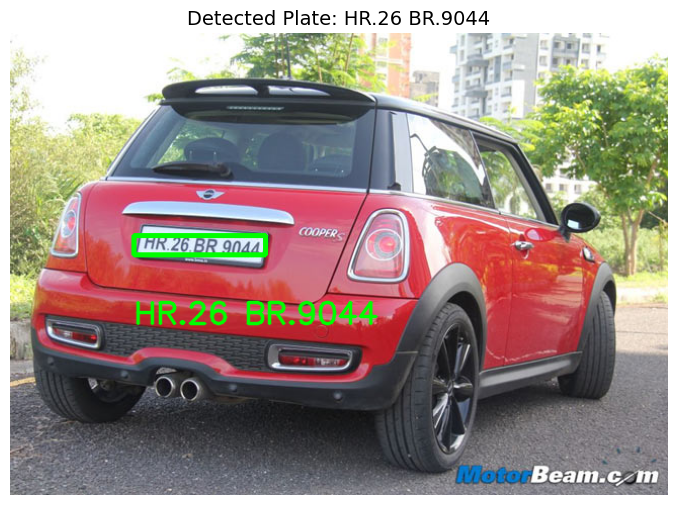

In [ ]:
import matplotlib.pyplot as plt

# Display final result with bounding box and text
plt.figure(figsize=(10, 6))  # Change size of the display window
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Plate: {text}", fontsize=14)
plt.axis('off')  # Hide axis ticks
plt.show()


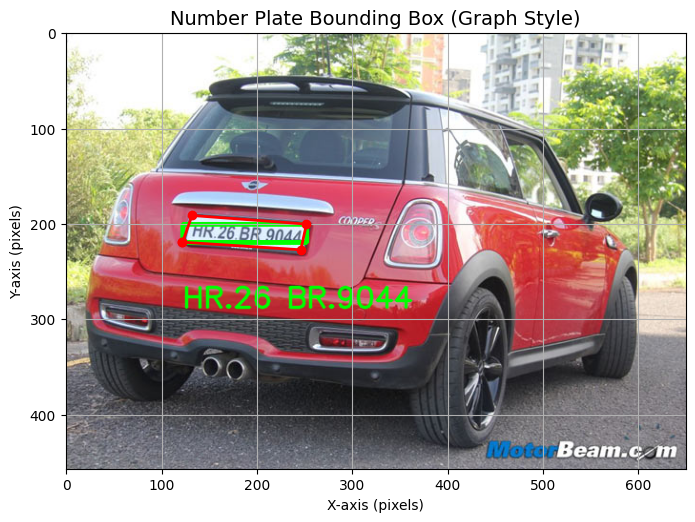

In [ ]:
import matplotlib.pyplot as plt

# Extract corner points from approx polygon
x_points = [point[0][0] for point in approx] + [approx[0][0][0]]  # to close the box
y_points = [point[0][1] for point in approx] + [approx[0][0][1]]

# Plot the points as a polygon
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.plot(x_points, y_points, color='red', linewidth=2, marker='o')  # Graph-style outline
plt.title("Number Plate Bounding Box (Graph Style)", fontsize=14)
plt.axis('on')
plt.grid(True)
plt.xlabel("X-axis (pixels)")
plt.ylabel("Y-axis (pixels)")
plt.show()


In [ ]:
for i, point in enumerate(approx):
    print(f"Corner {i+1}: x = {point[0][0]}, y = {point[0][1]}")


Corner 1: x = 122, y = 219
Corner 2: x = 246, y = 227
Corner 3: x = 252, y = 200
Corner 4: x = 132, y = 191


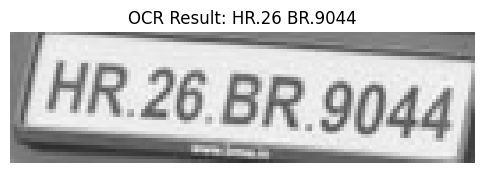

In [ ]:
plt.figure(figsize=(6, 4))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title(f"OCR Result: {text}", fontsize=12)
plt.axis('off')
plt.show()


In [ ]:
# Example: plotting multiple detected texts with their confidence (if available)
if len(result) > 1:
    texts = [r[1] for r in result]
    confidences = [r[2] for r in result]

    plt.figure(figsize=(8, 4))
    plt.bar(texts, confidences, color='green')
    plt.title("OCR Confidence per Detected Text")
    plt.xlabel("Detected Text")
    plt.ylabel("Confidence")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()


In [ ]:
import cv2
import easyocr
import pandas as pd
import os

reader = easyocr.Reader(['en'])
results = []

image_folder = "/content/plates"
images = []

# Get all image paths from subfolders
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            images.append(os.path.join(root, file))

# OCR loop
for img_path in images:
    img = cv2.imread(img_path)
    if img is None:
        print(f"🚫 Skipping unreadable image: {img_path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ocr_result = reader.readtext(gray)

    if ocr_result:
        plate = ocr_result[0][1].replace(" ", "").upper()
    else:
        plate = "NOT_DETECTED"

    results.append({'Image': os.path.basename(img_path), 'Predicted': plate})

# Save results
df = pd.DataFrame(results)
df.to_csv('/content/predicted_plates.csv', index=False)
print("✅ Predictions saved to /content/predicted_plates.csv")


✅ Predictions saved to /content/predicted_plates.csv


In [ ]:
from google.colab import files
files.download('/content/predicted_plates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose your labeled CSV file


Saving predicted_plates (3).csv to predicted_plates (3).csv


In [ ]:
import pandas as pd

file_path = '/content/predicted_plates (3).csv'

# Load CSV
df = pd.read_csv(file_path)

# Show first few rows and columns
df.columns.tolist(), df.head()


(['Image', 'Predicted'],
          Image  Predicted
 0  Cars411.png      VIPER
 1  Cars207.png    MYOTHER
 2   Cars91.png      WO6L;
 3   Cars45.png         OD
 4  Cars364.png  ELBC:DEED)

In [ ]:
df['Actual'] = ''  # Empty column for you to fill
output_path = '/content/predicted_plates (3).csv'
df.to_csv(output_path, index=False)
output_path


'/content/predicted_plates (3).csv'

In [ ]:
# Better cleaning to handle dashes, spaces, etc.
df['Actual'] = df['Actual'].astype(str).str.replace(" ", "").str.replace("-", "").str.upper()
df['Predicted'] = df['Predicted'].astype(str).str.replace(" ", "").str.replace("-", "").str.upper()


In [ ]:
!pip install easyocr imutils

import cv2
import numpy as np
import easyocr
import imutils
from matplotlib import pyplot as plt

# Reader initialize once
reader = easyocr.Reader(['en'])

# Load video
video_path = '/content/demo.mp4'
cap = cv2.VideoCapture(video_path)

# Video writer setup
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/processed_output.mp4', fourcc, fps, (frame_width, frame_height))

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    try:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
        edged = cv2.Canny(bfilter, 30, 200)

        keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

        location = None
        for contour in contours:
            approx = cv2.approxPolyDP(contour, 10, True)
            if len(approx) == 4:
                location = approx
                break

        if location is not None:
            mask = np.zeros(gray.shape, np.uint8)
            new_image = cv2.drawContours(mask, [location], 0,255, -1)
            new_image = cv2.bitwise_and(frame, frame, mask=mask)
            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]

            result = reader.readtext(cropped_image)
            if result:
                text = result[0][-2]
                font = cv2.FONT_HERSHEY_SIMPLEX
                frame = cv2.putText(frame, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
                frame = cv2.rectangle(frame, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)

    except Exception as e:
        print(f"Frame {frame_count} skipped due to error: {e}")

    out.write(frame)
    frame_count += 1

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing done. Saved to /content/processed_output.mp4")


✅ Video processing done. Saved to /content/processed_output.mp4


In [ ]:
!git clone https://github.com/Arijit1080/Licence-Plate-Detection-using-YOLO-V8.git

In [ ]:
cd /content/Licence-Plate-Detection-using-YOLO-V8

In [ ]:
!pip install roboflow

from roboflow import Roboflow

# Use your actual API key here
rf = Roboflow(api_key="zoscYwfVTpaaoHy4EAll")

# Access the correct project and version
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)

# Download the dataset for YOLOv8
dataset = version.download("yolov8")


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python /content/Licence-Plate-Detection-using-YOLO-V8/ultralytics/yolo/v8/detect/train.py model=yolov8n.pt data=/content/Licence-Plate-Detection-using-YOLO-V8/License-Plate-Detector-1/data.yaml epochs=100

In [ ]:
# ✅ Step 1: Install Required Library
!pip install ultralytics roboflow

# ✅ Step 2: Download Dataset from Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="zoscYwfVTpaaoHy4EAll")  # <-- Your API Key
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")

# ✅ Step 3: Train YOLOv8 Model using CLI
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640


In [ ]:
!pip install torch==2.5.1 torchvision==0.17.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu121


In [ ]:
import pandas as pd

# Load YOLOv8 training results
df = pd.read_csv("/content/runs/detect/train/results.csv")
df.columns = df.columns.str.strip()  # Remove spaces from column names

# Get last epoch's precision & recall
last = df.tail(1)
precision = last["metrics/precision(B)"].values[0]
recall = last["metrics/recall(B)"].values[0]

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("📊 YOLOv8 Final Metrics:")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall:    {recall:.4f}")
print(f"🔹 F1 Score:  {f1_score:.4f}")

# Optional: Treating mAP50 as proxy for accuracy (not perfect but common)
accuracy = last["metrics/mAP50(B)"].values[0]
print(f"🔹 Accuracy (approx via mAP50): {accuracy:.4f}")


In [ ]:
import pandas as pd

# Load results
df = pd.read_csv("/content/runs/detect/train/results.csv")

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Get last epoch’s metrics
last_row = df.tail(1)[["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)"]]

# Show metrics
print("📊 Final YOLOv8 Detection Performance:")
print(last_row.to_string(index=False))
